The cleaning of both textual and quantitative as no simple solution as each dataset has to be treated separately. Hence, the data will be tackled separately.

## Quantitative Data 

 For quantitative data, data cleaning is essential to guaranteeing the dependability and correctness of analytical findings. We can receive imprecise statistical analyses from errors, outliers, and missing values, which might result in incorrect interpretations and decisions. Extensive data cleaning improves the quality of the data by identifying and fixing errors, managing outliers, and addressing inconsistent or missing information. 


In [2]:
# libraries to import

from fredapi import Fred
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

fred = Fred(api_key='10fbe66f8f62ad7f44097cca867bf01f')

series_id_1 = 'GDP' # for GDP US
series_id_2='GDPC1' # for Real Gross GDP
series_id_3='W207RC1Q156SBEA' # Adjusted Saving (% of GNI)
series_id_4='USAB6BLTT02STSAQ' # Current account balance (% of GDP)
series_id_5='A019RE1Q156NBEA' # Export of Goods and Services as percentage of GDP
series_id_6='MKTGNIUSA646NWDB' # GNI

# Set the start and end dates where I need data from 1990 to 2023
start_date = '1973'
end_date = '2023'

# Fetch the data
gdp_u = fred.get_series(series_id_1, start_date, end_date)
realgdp_u = fred.get_series(series_id_2, start_date, end_date)
adjsavings_u = fred.get_series(series_id_3, start_date, end_date)
currentaccbalance_u = fred.get_series(series_id_4, start_date, end_date)
exportsofgoods_u = fred.get_series(series_id_5, start_date, end_date)
gni_u= fred.get_series(series_id_6, start_date, end_date)

# for GDP
df1= gdp_u.to_frame(name=('GDP'))
annual_gdp_u = df1.resample('A').mean()
annual_gdp_u['Year'] = annual_gdp_u.index.year
annual_gdp_u=annual_gdp_u[['Year', 'GDP']]
annual_gdp_u.reset_index(drop=True, inplace=True)
print(annual_gdp_u.head(5))

# Real GDP
df2= realgdp_u.to_frame(name=('Real GDP'))
annual_realgdp_u = df2.resample('A').mean()
annual_realgdp_u['Year'] = annual_realgdp_u.index.year
annual_realgdp_u.reset_index(drop=True, inplace=True)
annual_realgdp_u.head(16)

# Adjusted Savings
df3= adjsavings_u.to_frame(name=('Adjusted Savings'))
annual_adjsavings_u = df3.resample('A').mean()
annual_adjsavings_u['Year'] = annual_adjsavings_u.index.year
annual_adjsavings_u.reset_index(drop=True, inplace=True)
annual_adjsavings_u.head(2)

# Current Account Balance % of GDP
df4= currentaccbalance_u.to_frame(name=('Current Account Balance'))
annual_currentaccbalance_u = df4.resample('A').mean()
annual_currentaccbalance_u['Year'] = annual_currentaccbalance_u.index.year
annual_currentaccbalance_u.reset_index(drop=True, inplace=True)
annual_currentaccbalance_u.head(2)

# Current Account Balance % of GDP
df5= exportsofgoods_u.to_frame(name=('Exports of Goods and Services'))
annual_exportsofgoods_u = df5.resample('A').mean()
annual_exportsofgoods_u['Year'] = annual_exportsofgoods_u.index.year
annual_exportsofgoods_u.reset_index(drop=True, inplace=True)
annual_exportsofgoods_u.head(2)

# GNI
df6= gni_u.to_frame(name=('GNI'))
annual_gni_u = df6.resample('A').mean()
annual_gni_u['Year'] = annual_gni_u.index.year
annual_gni_u.reset_index(drop=True, inplace=True)
annual_gni_u.head(10)

merged_df= pd.merge(annual_gdp_u, annual_realgdp_u, how= 'outer', on= 'Year' )
merged_df= pd.merge(merged_df, annual_adjsavings_u, how= 'outer', on= 'Year')
merged_df= pd.merge(merged_df, annual_currentaccbalance_u, how= 'outer', on= 'Year' )
merged_df= pd.merge(merged_df, annual_exportsofgoods_u, how= 'outer', on= 'Year' )
merged_df= pd.merge(merged_df, annual_gni_u, how= 'outer', on= 'Year' )

# join them
merged_df= pd.merge(annual_gdp_u, annual_realgdp_u, how= 'outer', on= 'Year' )
merged_df= pd.merge(merged_df, annual_adjsavings_u, how= 'outer', on= 'Year')
merged_df= pd.merge(merged_df, annual_currentaccbalance_u, how= 'outer', on= 'Year' )
merged_df= pd.merge(merged_df, annual_exportsofgoods_u, how= 'outer', on= 'Year' )
merged_df= pd.merge(merged_df, annual_gni_u, how= 'outer', on= 'Year' )

   Year        GDP
0  1973  1425.3760
1  1974  1545.2425
2  1975  1684.9050
3  1976  1873.4125
4  1977  2081.8250


Some of the major problems faced here was that the data was quaterly in nature and hence had to resample it to a 'Year' by taking the average across all the quarters for that each specific year and then it is finally merged.

In [3]:
merged_df.isna().sum()


Year                             0
GDP                              0
Real GDP                         0
Adjusted Savings                 0
Current Account Balance          0
Exports of Goods and Services    0
GNI                              1
dtype: int64

Here, we see that there is only one missing value. Usually, imputing missing values for economic data isn't a good choice since you're changing the effect of that specific value by computing the mean average of the value. However, for this project since data without missing values is a requirement for further modelling, mean value imputation is used. 

In [4]:
merged_df['GNI'] = merged_df['GNI'].fillna(merged_df['GNI'].mean())
merged_df.isna().sum()
merged_df.head(10)

,Year,GDP,Real GDP,Adjusted Savings,Current Account Balance,Exports of Goods and Services,GNI
0,1973,1425.37600,6106.37050,10.925,0.492313,0.275,1.431848e+12
1,1974,1545.24250,6073.36275,9.200,0.129574,-0.050,1.553300e+12
2,1975,1684.90500,6060.87525,6.500,1.075657,0.950,1.684554e+12
3,1976,1873.41250,6387.43650,7.450,0.233895,-0.050,1.869603e+12
4,1977,2081.82500,6682.80450,8.125,-0.683540,-1.125,2.082670e+12
5,1978,2351.59875,7052.71125,9.375,-0.661201,-1.125,2.349856e+12
6,1979,2627.32625,7275.99925,9.200,-0.012445,-0.875,2.614202e+12
7,1980,2857.30850,7257.31650,7.050,0.073883,-0.450,2.847055e+12
8,1981,3207.04125,7441.48500,8.000,0.156610,-0.375,3.201886e+12
9,1982,3343.78925,7307.31400,5.625,-0.161860,-0.600,3.371448e+12


This is how the final dataframe looks like for the US data.

## Textual Data 

In [5]:
import string
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer as SIA
import  numpy as np

df= pd.read_csv('../data/csv_files_textual/sentiment_raw.csv')

#nltk.download('punkt')
#nltk.download('stopwords')

def clean_string(text):
    # lowercase the text
    text = text.lower()
    
    # replace with regular quotations, added this since there were few texts that weren't cleaned
    text = text.replace('’', "'")
    
    # remove emojis, saw a list of them online so just added them.
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Pictographs
                           u"\U0001F0D0-\U0001F0FF"  # Emoticons
                           u"\U0001F1E0-\U0001F1FF"  # Regional Indicator Symbols
                           u"\U0001F200-\U0001F251"  # Enclosed Ideographic Supplement
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)  # Remove emojis
    
    # line breaks removal
    text = text.replace('\n', ' ')
    
    #  punctuation removal
    text = ''.join([char for char in text if char not in string.punctuation])
    
    #  tokenize the text
    words = nltk.word_tokenize(text)
    
    # remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    # rejoin the words into a cleaned string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# into df

df['cleaned_tweets'] = df['body'].apply(clean_string)

display(df)

,body,cleaned_tweets
0,Burn him with his flag 🤬,burn flag
1,This plan is to kill the Petro Dollar run and ...,plan kill petro dollar run manipulated western...
2,It’s difficult to know what’s going to come ou...,difficult know whats going come summit next we...
3,There is a lot to unpack as to what BRICS woul...,lot unpack brics would bring table officially ...
4,"Nice that you ""feel"" that way. That's what BRI...",nice feel way thats brics supped make feel lik...
...,...,...
114,Emergence of Great EURASIA Looming Against Bac...,emergence great eurasia looming background dec...
115,"“De-Dollarization”: Iran, Russia Planning to E...",“ dedollarization ” iran russia planning estab...
116,"Launch Of BRICS Bank, Alternative To IMF\n\nBy...",launch brics bank alternative imf staff july 1...
117,Well. I see it’s now been 9 years. Here’s the ...,well see 9 years heres latest subject httpswww...


Here, with the clean_string code picked from one the class notes, I have added the emoji code to it to remove the emoticons completely. Here, we can see the cleaned and uncleaned textual data.

In [6]:
# vectorising the data

df2=df['cleaned_tweets']
vectorizer = CountVectorizer()
value = [str(element) for element in df2]
vectorizer=CountVectorizer()
Xs  =  vectorizer.fit_transform(value)   
print(type(Xs))
print("vocabulary = ",vectorizer.vocabulary_)   
print("stop words =", vectorizer.stop_words)
col_names=vectorizer.get_feature_names_out()
print("col_names=",col_names)

# performing sentimental analysis using the Sentiment Intensity Analyser

sia = SIA()
results = []

for tweet in df['cleaned_tweets']:  
    polarity = sia.polarity_scores(tweet)
    polarity['cleaned_tweets'] = tweet 
    results.append(polarity)


sentiment_df = pd.DataFrame(results)
display(sentiment_df.head())


<class 'scipy.sparse._csr.csr_matrix'>
vocabulary =  {'burn': 350, 'flag': 889, 'plan': 1664, 'kill': 1260, 'petro': 1647, 'dollar': 680, 'run': 1936, 'manipulated': 1382, 'western': 2465, 'central': 388, 'banks': 244, 'controlled': 499, 'cabal': 357, 'brics': 328, 'replaced': 1859, 'fiat': 866, 'currency': 564, 'gold': 993, 'tangible': 2221, 'asset': 202, 'value': 2401, 'supposedly': 2196, 'quantum': 1791, 'financial': 877, 'system': 2210, 'qfs': 1789, 'line': 1328, 'also': 130, 'backed': 227, 'banking': 243, 'setting': 2021, 'mankind': 1385, 'free': 928, 'slavery': 2076, 'control': 498, 'difficult': 657, 'know': 1269, 'whats': 2469, 'going': 992, 'come': 444, 'summit': 2188, 'next': 1512, 'week': 2458, 'first': 886, 'announced': 149, 'introduction': 1200, 'goldback': 994, 'intended': 1183, 'compete': 461, 'us': 2385, 'said': 1954, 'goldlinked': 996, 'trade': 2297, 'settlement': 2023, 'course': 534, 'would': 2499, 'dedollarization': 603, 'effect': 720, 'theyre': 2257, 'saying': 1968, 

,neg,neu,pos,compound,cleaned_tweets
0,0.000,1.000,0.000,0.0000,burn flag
1,0.289,0.551,0.160,-0.8885,plan kill petro dollar run manipulated western...
2,0.039,0.939,0.022,-0.2732,difficult know whats going come summit next we...
3,0.058,0.765,0.177,0.8748,lot unpack brics would bring table officially ...
4,0.000,0.705,0.295,0.7269,nice feel way thats brics supped make feel lik...


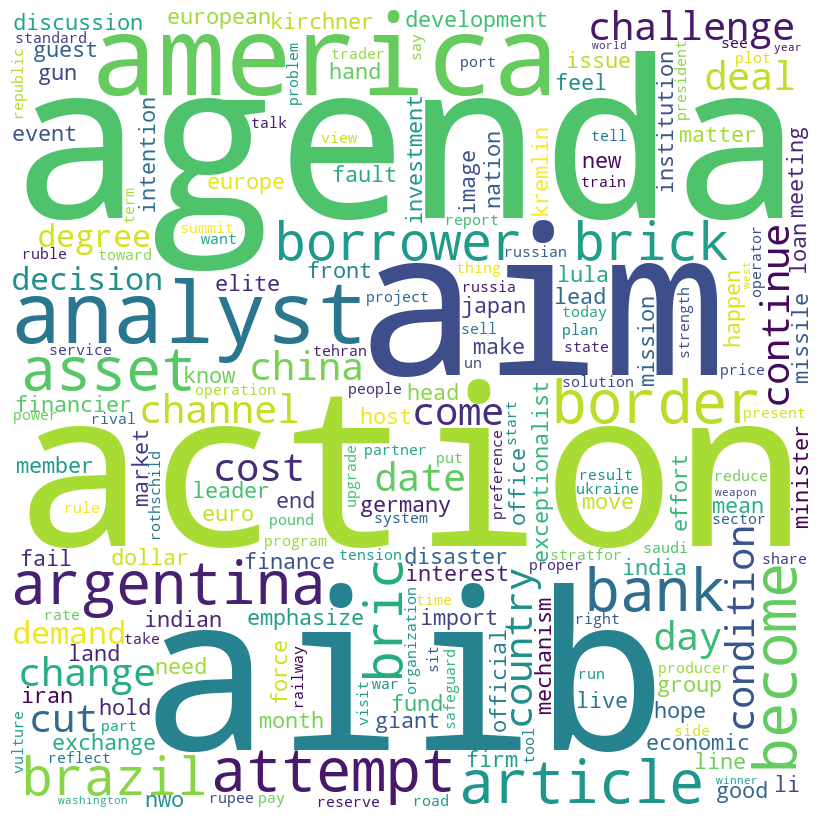

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = vectorizer.stop_words, 
                min_font_size = 10).generate(" ".join(col_names)) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


Looking into this words set, we do get a public's opinion of what they think of BRICS. You see words like 'agenda', 'aim', 'action', thus revealing the key themes of the conversations from Reddit. This showcases a general and positive opinion amongst people.

One tool intended for sentiment analysis is the SentimentIntensityAnalyzer found in the Natural Language Toolkit (NLTK). Text is given polarity scores that represent a positive, negative, or neutral mood. The analyzer here has evaluated the tone of Reddit posts within the context of textual data from the Reddit API. The SentimentIntensityAnalyzer is used to parse the text, and the resultant compound score summarises the sentiment in general. This score helps determine the general mood of Reddit discussions and offers insightful information about the community's emotional tone. This information is useful for examining user viewpoints, trends, or attitudes regarding different topics.

In [8]:
sentiment_df['label']= 0
sentiment_df['label'] = np.where(sentiment_df['compound'] > 0, 1, sentiment_df['label'])  # Set 'label' to 1 where 'compound' > 0.2
sentiment_df['label'] = np.where(sentiment_df['compound'] < 0, -1, sentiment_df['label'])  # Set 'label' to -1 where 'compound' < -0.2
sentiment_df.head()


,neg,neu,pos,compound,cleaned_tweets,label
0,0.000,1.000,0.000,0.0000,burn flag,0
1,0.289,0.551,0.160,-0.8885,plan kill petro dollar run manipulated western...,-1
2,0.039,0.939,0.022,-0.2732,difficult know whats going come summit next we...,-1
3,0.058,0.765,0.177,0.8748,lot unpack brics would bring table officially ...,1
4,0.000,0.705,0.295,0.7269,nice feel way thats brics supped make feel lik...,1


Here, any compound value less than zero is negative with a value of '-1', any compound value greater than 0 is positive denoted by '1'.

In [9]:
finaldf=sentiment_df[['cleaned_tweets', 'label']]
finaldf=pd.DataFrame(finaldf)
display(finaldf.head(10))

,cleaned_tweets,label
0,burn flag,0
1,plan kill petro dollar run manipulated western...,-1
2,difficult know whats going come summit next we...,-1
3,lot unpack brics would bring table officially ...,1
4,nice feel way thats brics supped make feel lik...,1
5,seems like well ahead schedule already 50 perc...,1
6,yeah precisely fully explained today family me...,1
7,watched lecture school predicted global south ...,1
8,think hope happens sooner rather later live eu...,1
9,supposed happen week hold boys,0


In [12]:
label_counts = finaldf['label'].value_counts()
label_counts

 1    63
 0    28
-1    28
Name: label, dtype: int64

We see that overall, in terms of the RedditAPI, there is generally a positive conversation about this. Though we need to look into it with more caution, as of now, this does tell us good things.

This is how the final cleaned textual dataset looks like.

## Source 

1. Hickman, J. (n.d.). DSAN5000 Slides and Labs: News API Code Demos. Retrieved from https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/labs/code-demos/API-newapi/news-api.html
2. Federal Reserve Economic Data (FRED). (n.d.). FRED API Documentation. Retrieved from https://fred.stlouisfed.org/docs/api/fred/
3. Stack Overflow Community. (n.d.). Removing emojis from a string in Python. Retrieved from https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
4. slowkow. (n.d.). Remove Emoji Python Script. Retrieved from https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
5. Mahreen, J . (2022). Sentiment Analysis using VADER. Retrieved from https://www.analyticsvidhya.com/blog/2022/10/sentiment-analysis-using-vader/